# Kütüphanelerin Yüklenmesi

In [11]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from fitter import Fitter

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)

# Veriseti : adult.csv

Veriseti kaynağı: https://archive.ics.uci.edu/ml/datasets/Adult

Amaç: gelirin, verilen bilgiler ışığında yıllık 50 bin dolardan fazla olup olmayacağının tahmin edilmesi. 

Veri alanları:

>50K, <=50K

* age: continuous

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

* fnlwgt: continuous

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

* education-num: continuous

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

* sex: Female, Male

* capital-gain: continuous

* capital-loss: continuous

* hours-per-week: continuous

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [3]:
data = pd.read_csv('adult.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Veri alanları ve veri tipleri:

In [5]:
print("veri alanları: \n")
print(list(data.columns))

veri alanları: 

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [6]:
print("veri tipleri: \n")
print("---------------------------")
print(data.dtypes)
print("---------------------------")
print("veri tipi sayıları: \n")
print(data.dtypes.value_counts())

veri tipleri: 

---------------------------
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object
---------------------------
veri tipi sayıları: 

object    9
int64     6
dtype: int64


# Veri Dağılımları

Dağılımlar için `fitter` modülünü kullanacağız. `fitter` modülü, varsayılan olarak `scipy` modülü altındaki yaklaşık 80 dağılım için veriyi uydurarak(fit) en düşük toplam kare hataya göre en uygun dağılımı bulmamızı sağlar. Bundan önce ilk olarak verisetindeki sayısal değişkenlerin betimsel istatistiklerine bakalım: 

In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## kategorik verilerin dağılımları:

Kategorik değişkenlerin dağılımlarına bakalım:

In [9]:
def plot_value_counts(series, title=None):
    '''
    Plot distribution of values counts in a pd.Series
    '''
    _ = plt.figure(figsize=(12,6))
    z = series.value_counts()
    sns.barplot(x=z, y=z.index)
    _ = plt.title(title)

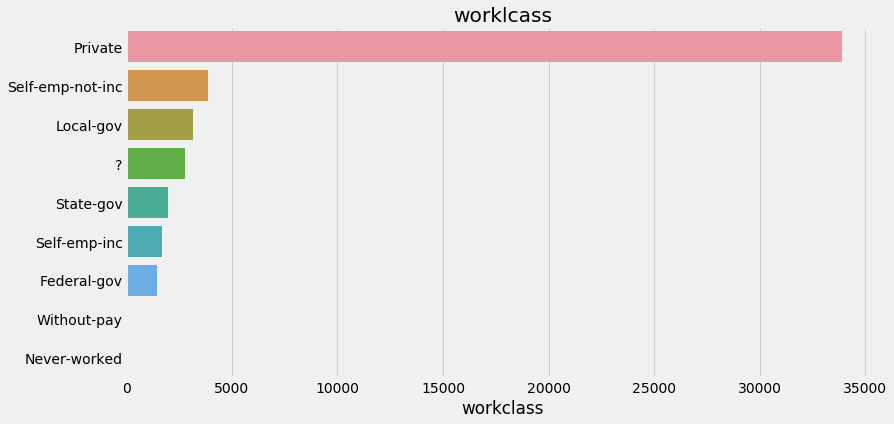

In [12]:
plot_value_counts(data["workclass"], "worklcass")

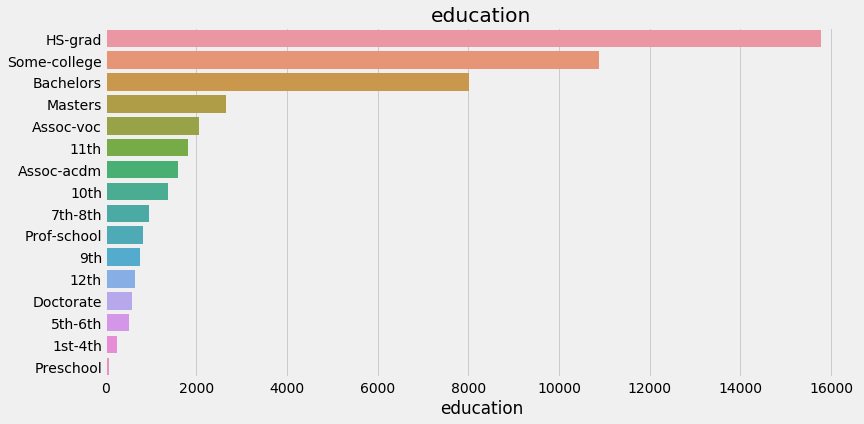

In [13]:
plot_value_counts(data["education"], "education")

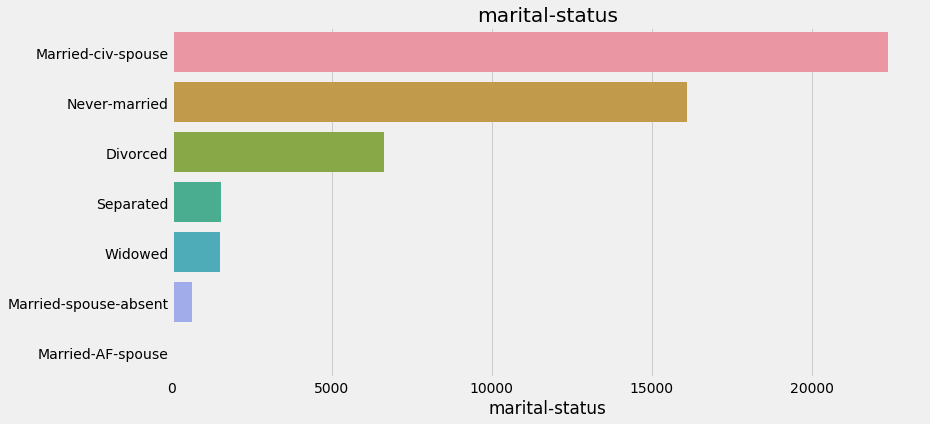

In [14]:
plot_value_counts(data["marital-status"], "marital-status")

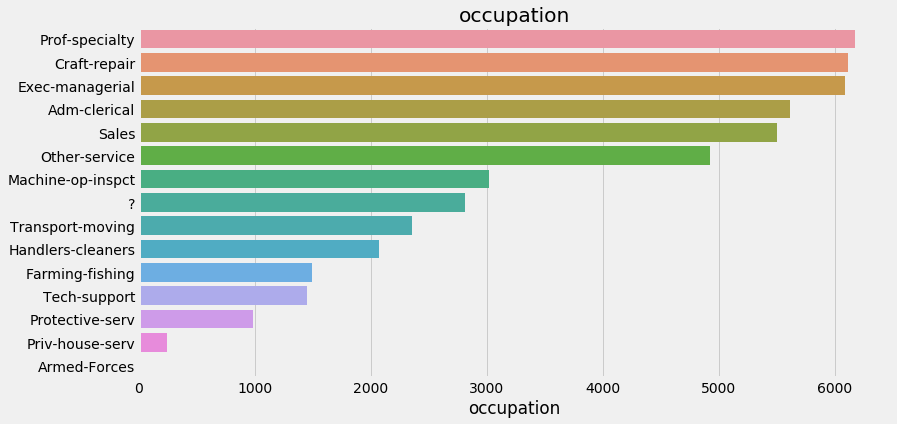

In [15]:
plot_value_counts(data["occupation"], "occupation")

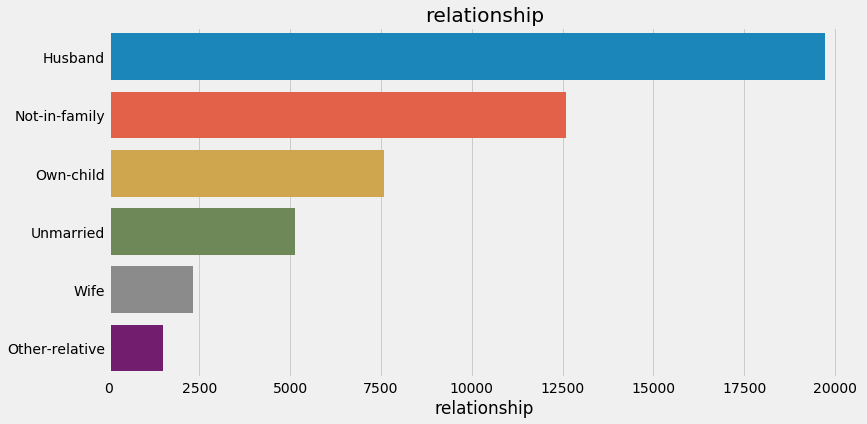

In [16]:
plot_value_counts(data["relationship"], "relationship")

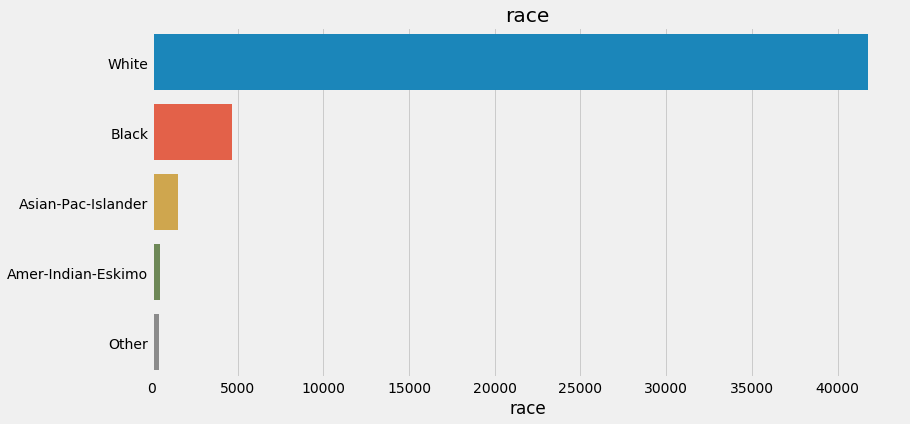

In [17]:
plot_value_counts(data["race"], "race")

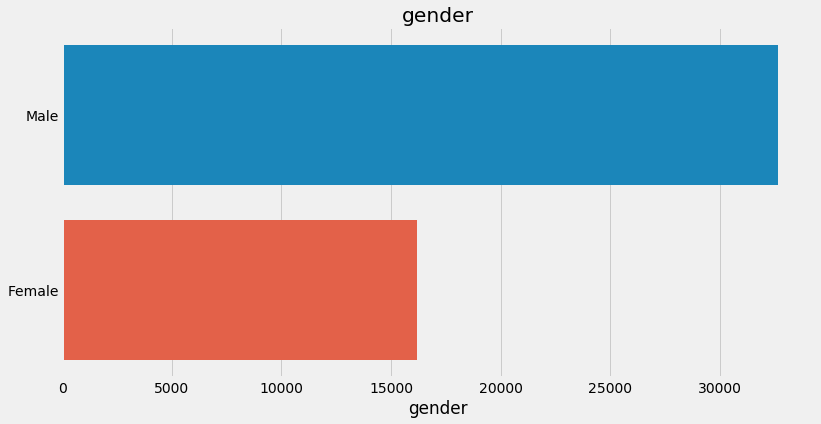

In [18]:
plot_value_counts(data["gender"], "gender")

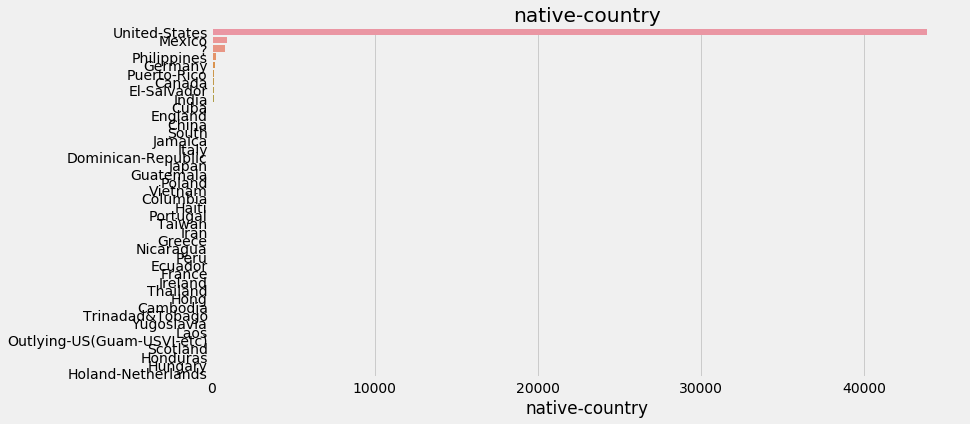

In [19]:
plot_value_counts(data["native-country"], "native-country")

## `age` değişkeni dağılımı:

Shapiro-Wilk normallik testi:

In [25]:
# normality test
stat, p = st.shapiro(data["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.967, p=0.000
Sample does not look Gaussian (reject H0)


D'Agustino-Pearson normallik testi:

In [26]:
# normality test
stat, p = st.normaltest(data["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2297.739, p=0.000
Sample does not look Gaussian (reject H0)


Anderson-Darling normallik testi:

In [27]:
# normality test
result = st.anderson(data["age"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 360.399
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Üç normallik testine göre de değişkenin normal dağılıma uyduğu H0 hipotezi güçlü bir şekilde reddedilmiştir. Peki değişken hangi dağılıma uymaktadır? Şimdi buna bakalım.

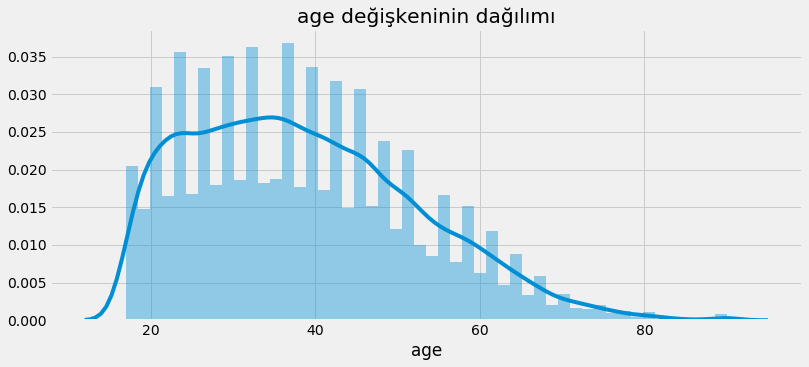

In [20]:
plt.figure(figsize=(12,5))
plt.title("age değişkeninin dağılımı")
ax = sns.distplot(data["age"])

`age` değişkeni için `Fitter` fonksiyonunu kuralım:

In [21]:
f_age = Fitter(data.age)

`f_age` fonksiyonunu uyduralım(fit):

In [22]:
f_age.fit()

Fitted alpha distribution with error=0.011839911033162384)
Fitted anglit distribution with error=0.01696489214998185)
Fitted arcsine distribution with error=0.029009508666281256)
Fitted argus distribution with error=0.02814186881328725)
Fitted beta distribution with error=0.010904938906937759)
Fitted betaprime distribution with error=0.01166367884652943)
Fitted bradford distribution with error=0.017875712959433538)
Fitted burr distribution with error=0.012202929442249941)
Fitted burr12 distribution with error=0.0117920838587119)
Fitted cauchy distribution with error=0.01469354942723399)
Fitted chi distribution with error=0.04276570632419929)
Fitted chi2 distribution with error=0.011615958456540799)
Fitted cosine distribution with error=0.014203762779991655)
Fitted crystalball distribution with error=0.012286853342266162)
Fitted dgamma distribution with error=0.013288160428419703)
Fitted dweibull distribution with error=0.01241453454218265)
Fitted erlang distribution with error=0.011615

,sumsquare_error
gausshyper,0.010790
genexpon,0.010825
kappa3,0.010833
nakagami,0.010903
beta,0.010905


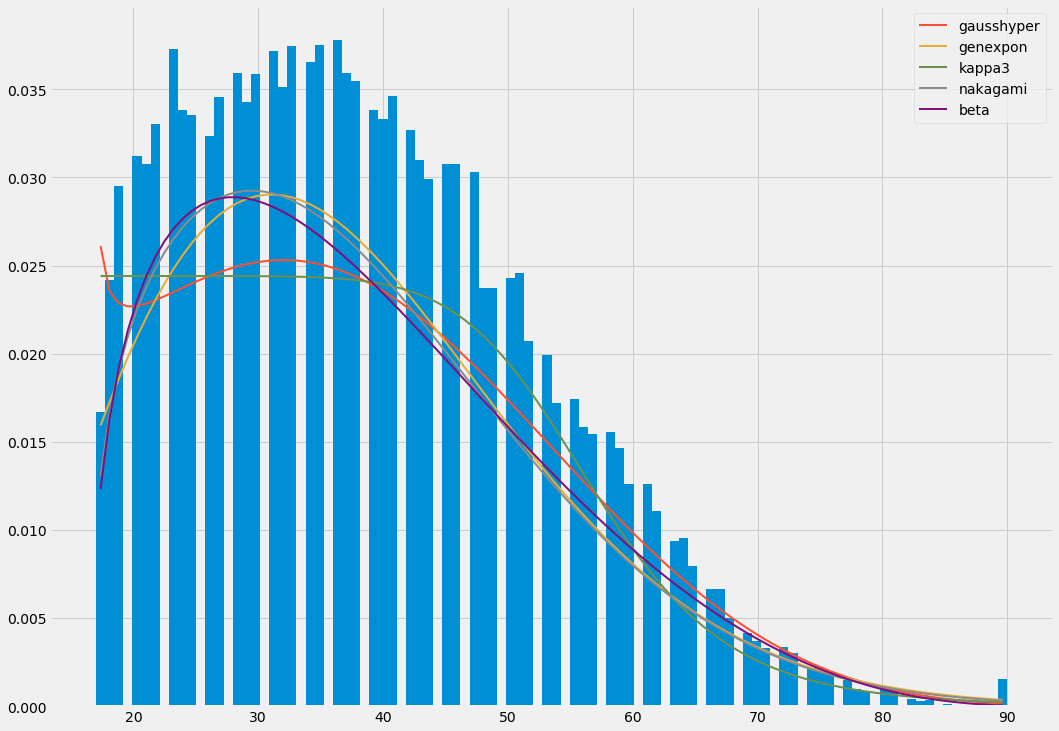

In [23]:
f_age.summary()

`age` değişkeni için en uygun dağılım en düşük toplam kare hataya sahip olan `gausshyper`(Gaussyan hiperparametrik) dağılımıdır.

## `fnlwgt` değişkeninin dağılımı:

Shapiro-Wilk normallik testi:

In [28]:
# normality test
stat, p = st.shapiro(data["fnlwgt"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.923, p=0.000
Sample does not look Gaussian (reject H0)


D'Agustino-Pearson normallik testi:

In [29]:
# normality test
stat, p = st.normaltest(data["fnlwgt"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=15801.452, p=0.000
Sample does not look Gaussian (reject H0)


Anderson-Darling normallik testi:

In [30]:
# normality test
result = st.anderson(data["fnlwgt"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 573.889
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Üç normallik testine göre de değişkenin normal dağılıma uyduğu H0 hipotezi güçlü bir şekilde reddedilmiştir. Peki değişken hangi dağılıma uymaktadır? Şimdi buna bakalım.

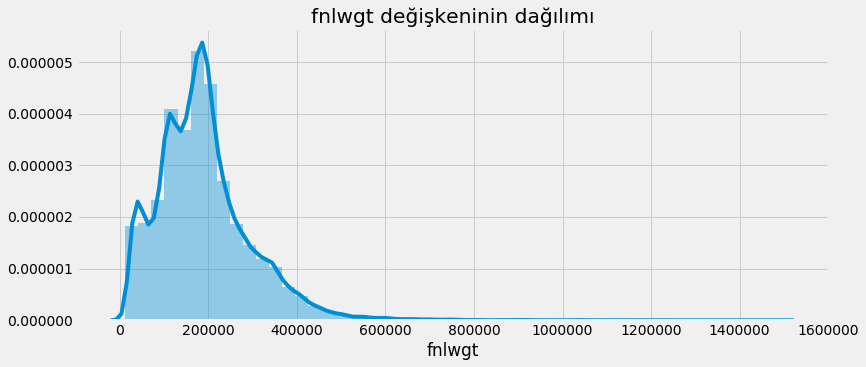

In [24]:
plt.figure(figsize=(12,5))
plt.title("fnlwgt değişkeninin dağılımı")
ax = sns.distplot(data["fnlwgt"])

`fnlwgt` değişkeni için `Fitter` fonksiyonunu kuralım:

In [32]:
f_fnlwgt = Fitter(data.fnlwgt)

`f_fnlwgt` fonksiyonunu uyduralım(fit):

In [33]:
f_fnlwgt.fit()

Fitted alpha distribution with error=9.976609664315224e-11)
Fitted anglit distribution with error=1.6133782208613e-10)
Fitted arcsine distribution with error=1.7230808729424524e-10)
Fitted argus distribution with error=2.048063201175048e-10)
Fitted beta distribution with error=1.5204597904347475e-11)
Fitted betaprime distribution with error=5.604471663529956e-11)
Fitted bradford distribution with error=1.0781873659113057e-10)
Fitted burr distribution with error=7.378083099223012e-11)
Fitted burr12 distribution with error=1.79933246093621e-10)
Fitted cauchy distribution with error=1.713776014166523e-11)
Fitted chi distribution with error=2.183813795705452e-10)
Fitted chi2 distribution with error=1.2634727491519064e-11)
Fitted cosine distribution with error=1.46525479943471e-10)
Fitted crystalball distribution with error=2.183813795705452e-10)
Fitted dgamma distribution with error=1.1212763870323597e-11)
Fitted dweibull distribution with error=1.0741563265531215e-11)
Fitted erlang distri

,sumsquare_error
gennorm,1.014029e-11
dweibull,1.074156e-11
loglaplace,1.076944e-11
hypsecant,1.097610e-11
dgamma,1.121276e-11


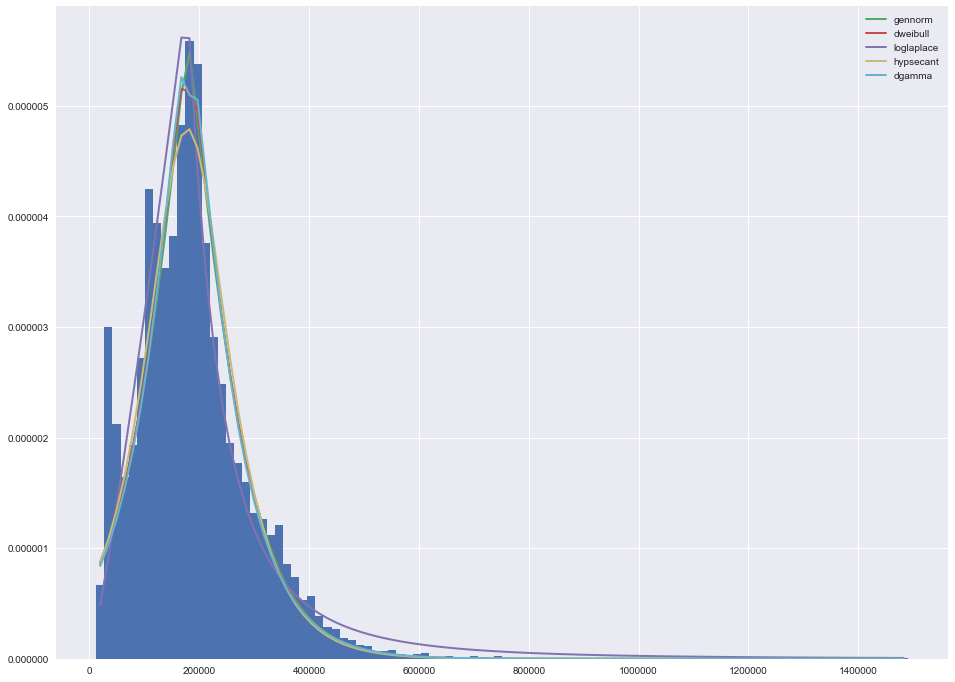

In [35]:
f_fnlwgt.summary()

`fnlwgt` değişkeni için en uygun dağılım en düşük toplam kare hataya sahip olan `gennorm`(genelleştirilmiş normal) dağılımıdır.

## `educational-num` değişkeninin dağılımı:

Shapiro-Wilk normallik testi:

In [31]:
# normality test
stat, p = st.shapiro(data["educational-num"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.926, p=0.000
Sample does not look Gaussian (reject H0)


D'Agustino-Pearson normallik testi:

In [32]:
# normality test
stat, p = st.normaltest(data["educational-num"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1250.569, p=0.000
Sample does not look Gaussian (reject H0)


Anderson-Darling normallik testi:

In [33]:
# normality test
result = st.anderson(data["educational-num"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1656.492
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Üç normallik testine göre de değişkenin normal dağılıma uyduğu H0 hipotezi güçlü bir şekilde reddedilmiştir. Peki değişken hangi dağılıma uymaktadır? Şimdi buna bakalım.

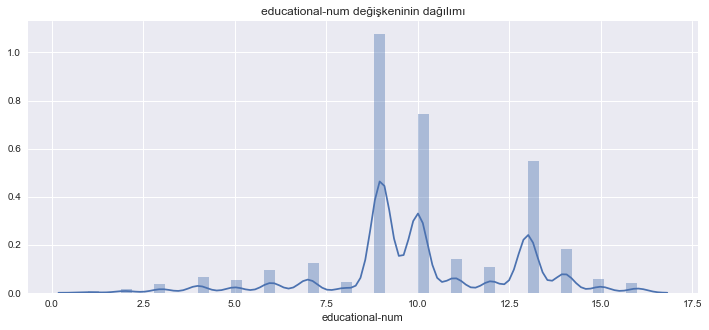

In [37]:
plt.figure(figsize=(12,5))
plt.title("educational-num değişkeninin dağılımı")
ax = sns.distplot(data["educational-num"])

`educational-num` değişkeni için `Fitter` fonksiyonunu kuralım:

In [38]:
f_educ = Fitter(data['educational-num'])

`f_educ` fonksiyonunu uyduralım(fit):

In [39]:
f_educ.fit()

Fitted alpha distribution with error=7.6837966669101885)
Fitted anglit distribution with error=7.852778492895544)
Fitted arcsine distribution with error=8.207093659323094)
Fitted argus distribution with error=7.8327092200610675)
Fitted beta distribution with error=7.702295679822105)
Fitted betaprime distribution with error=7.685530392106765)
Fitted bradford distribution with error=8.02284330722407)
Fitted burr distribution with error=7.66182074419426)
Fitted burr12 distribution with error=7.718362258811475)
Fitted cauchy distribution with error=7.504848710497411)
Fitted chi distribution with error=7.684720162767489)
Fitted chi2 distribution with error=7.685458145127717)
Fitted cosine distribution with error=7.77415071452335)
Fitted crystalball distribution with error=7.686396328142232)
Fitted dgamma distribution with error=7.560082748123055)
Fitted dweibull distribution with error=7.297608904097363)
Fitted erlang distribution with error=7.684111904991657)
Fitted expon distribution with

,sumsquare_error
dweibull,7.297609
gennorm,7.393287
johnsonsu,7.465057
foldcauchy,7.503771
cauchy,7.504849


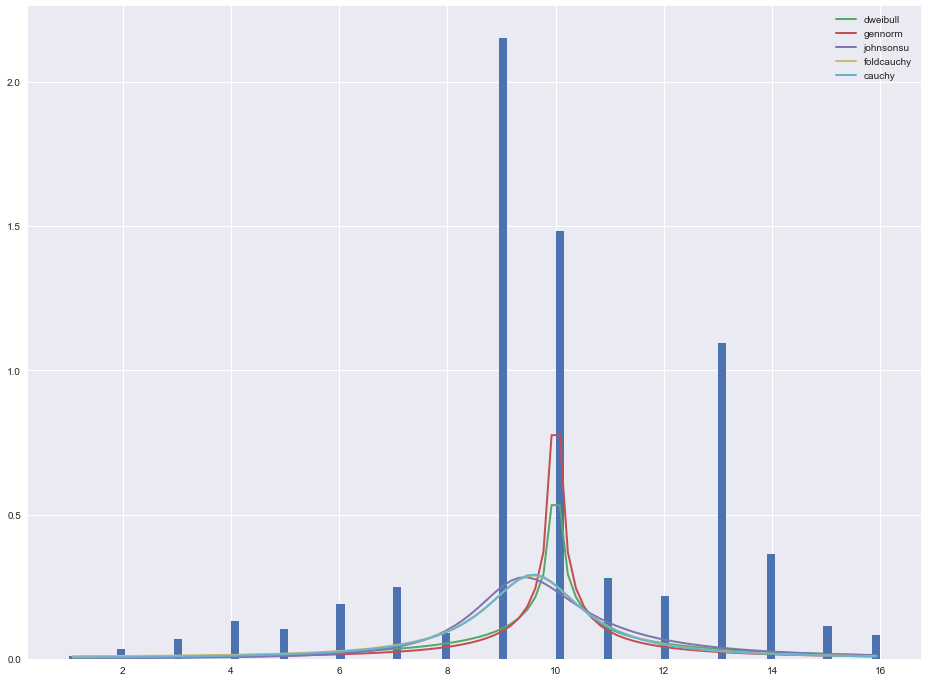

In [40]:
f_educ.summary()

`educational-num` değişkeni için en uygun dağılım en düşük toplam kare hataya sahip olan `dweibull`(çift Weibull(double Weibull)) dağılımıdır.

## `capital-gain` değişkeninin dağılımı:

Shapiro-Wilk normallik testi:

In [34]:
# normality test
stat, p = st.shapiro(data["capital-gain"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.121, p=0.000
Sample does not look Gaussian (reject H0)


D'Agustino-Pearson normallik testi:

In [35]:
# normality test
stat, p = st.normaltest(data["capital-gain"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=82380.708, p=0.000
Sample does not look Gaussian (reject H0)


Anderson-Darling normallik testi:

In [36]:
# normality test
result = st.anderson(data["capital-gain"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 15742.774
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Üç normallik testine göre de değişkenin normal dağılıma uyduğu H0 hipotezi güçlü bir şekilde reddedilmiştir. Peki değişken hangi dağılıma uymaktadır? Şimdi buna bakalım.

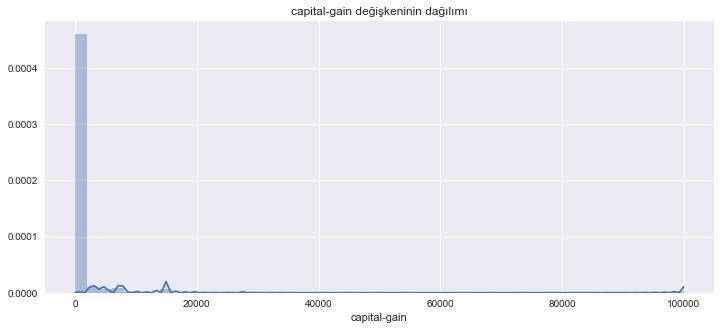

In [41]:
plt.figure(figsize=(12,5))
plt.title("capital-gain değişkeninin dağılımı")
ax = sns.distplot(data["capital-gain"])

`capital-gain` değişkeni için `Fitter` fonksiyonunu kuralım:

In [42]:
f_capgain = Fitter(data['capital-gain'])

`f_capgain` fonksiyonunu uyduralım(fit):

In [43]:
f_capgain.fit()

Fitted alpha distribution with error=8.453977570925233e-07)
Fitted anglit distribution with error=8.160771148495231e-07)
Fitted arcsine distribution with error=7.71378992821235e-07)
Fitted argus distribution with error=8.4771888722719e-07)
Fitted beta distribution with error=5.633638049129098e-07)
Fitted betaprime distribution with error=8.453977570925233e-07)
Fitted bradford distribution with error=6.987772750129685e-07)
Fitted burr distribution with error=8.451171013116383e-07)
Fitted burr12 distribution with error=8.054293926810329e-07)
Fitted cauchy distribution with error=8.453977570925233e-07)
Fitted chi distribution with error=5.027197632637899e-07)
Fitted chi2 distribution with error=6.474106631694336e-07)
Fitted cosine distribution with error=8.079580966882146e-07)
Fitted crystalball distribution with error=8.453977570925233e-07)
Fitted dgamma distribution with error=5.225872169494451e-07)
Fitted dweibull distribution with error=5.05435261437667e-07)
Fitted erlang distribution

,sumsquare_error
pearson3,7.759252e-08
wald,1.440120e-07
exponnorm,1.719473e-07
genexpon,1.725598e-07
expon,1.725599e-07


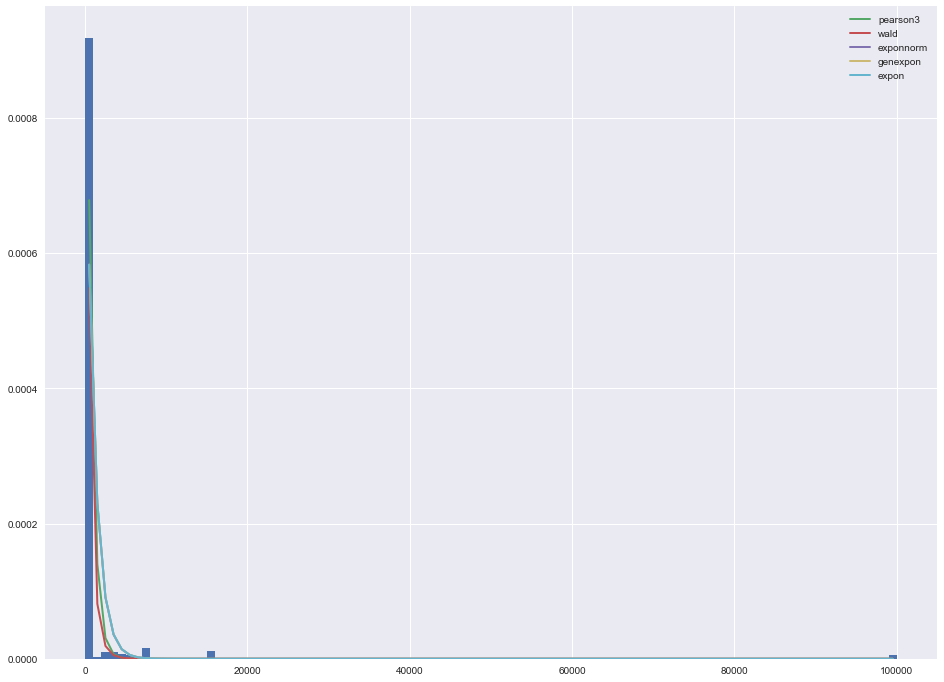

In [44]:
f_capgain.summary()

`capital-gain` değişkeni için en uygun dağılım en düşük toplam kare hataya sahip olan `pearson3`(pearson tip-3) dağılımıdır.

## `capital-loss` değişkeninin dağılımı:

Shapiro-Wilk normallik testi:

In [37]:
# normality test
stat, p = st.shapiro(data["capital-loss"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.219, p=0.000
Sample does not look Gaussian (reject H0)


D'Agustino-Pearson normallik testi:

In [38]:
# normality test
stat, p = st.normaltest(data["capital-loss"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=43751.637, p=0.000
Sample does not look Gaussian (reject H0)


Anderson-Darling normallik testi:

In [39]:
# normality test
result = st.anderson(data["capital-loss"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 17487.077
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Üç normallik testine göre de değişkenin normal dağılıma uyduğu H0 hipotezi güçlü bir şekilde reddedilmiştir. Peki değişken hangi dağılıma uymaktadır? Şimdi buna bakalım.

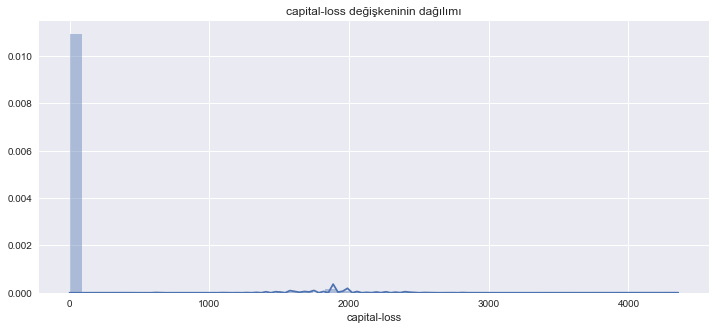

In [45]:
plt.figure(figsize=(12,5))
plt.title("capital-loss değişkeninin dağılımı")
ax = sns.distplot(data["capital-loss"])

`capital-loss` değişkeni için `Fitter` fonksiyonunu kuralım:

In [46]:
f_caploss = Fitter(data['capital-loss'])

`f_caploss` fonksiyonunu uyduralım(fit):

In [47]:
f_caploss.fit()

Fitted alpha distribution with error=0.000479056563903278)
Fitted anglit distribution with error=0.0004727411511618535)
Fitted arcsine distribution with error=0.00043932412521821405)
Fitted argus distribution with error=0.00047522256296460546)
Fitted beta distribution with error=0.0003045763574699473)
Fitted betaprime distribution with error=0.000479056563903278)
Fitted bradford distribution with error=0.0004178045872424776)
Fitted burr distribution with error=0.00047905653309808315)
Fitted burr12 distribution with error=0.00024728132083447554)
Fitted cauchy distribution with error=0.000479056563903278)
Fitted chi distribution with error=0.00034841449758758167)
Fitted chi2 distribution with error=0.00038789292641362884)
Fitted cosine distribution with error=0.0004710570177248084)
Fitted crystalball distribution with error=0.000479056563903278)
Fitted dgamma distribution with error=0.00031430855541921085)
Fitted dweibull distribution with error=0.000374316166289916)
Fitted erlang distri

,sumsquare_error
wald,0.000106
pearson3,0.000140
exponweib,0.000157
recipinvgauss,0.000173
gompertz,0.000186


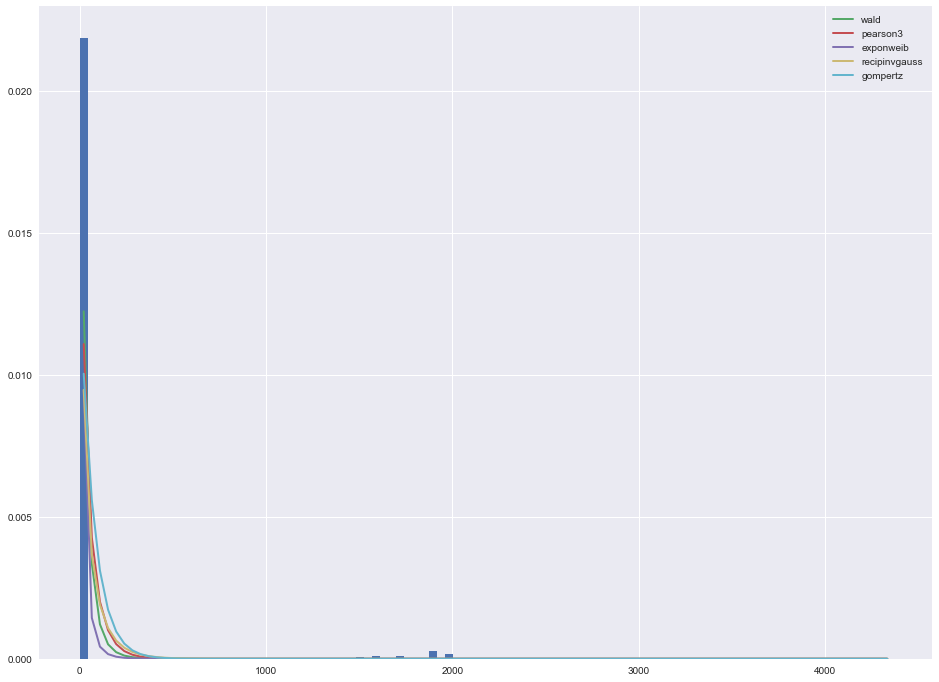

In [48]:
f_caploss.summary()

`capital-loss` değişkeni için en uygun dağılım en düşük toplam kare hataya sahip olan `wald`(Wald) dağılımıdır.

## `hours-per-week` değişkeninin dağılımı:

Shapiro-Wilk normallik testi:

In [40]:
# normality test
stat, p = st.shapiro(data["hours-per-week"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.884, p=0.000
Sample does not look Gaussian (reject H0)


D'Agustino-Pearson normallik testi:

In [41]:
# normality test
stat, p = st.normaltest(data["hours-per-week"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=3839.254, p=0.000
Sample does not look Gaussian (reject H0)


Anderson-Darling normallik testi:

In [42]:
# normality test
result = st.anderson(data["hours-per-week"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2658.084
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Üç normallik testine göre de değişkenin normal dağılıma uyduğu H0 hipotezi güçlü bir şekilde reddedilmiştir. Peki değişken hangi dağılıma uymaktadır? Şimdi buna bakalım.

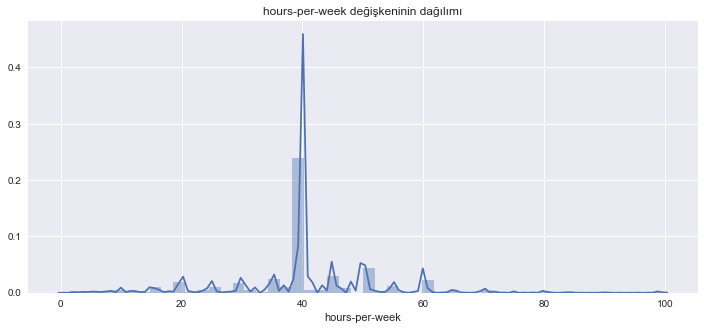

In [49]:
plt.figure(figsize=(12,5))
plt.title("hours-per-week değişkeninin dağılımı")
ax = sns.distplot(data["hours-per-week"])

`hours-per-week` değişkeni için `Fitter` fonksiyonunu kuralım:

In [50]:
f_hpw = Fitter(data['hours-per-week'])

`f_hpw` fonksiyonunu uyduralım(fit):

In [51]:
f_hpw.fit()

Fitted alpha distribution with error=0.21916547781818188)
Fitted anglit distribution with error=0.23078939562265452)
Fitted arcsine distribution with error=0.24466454959959152)
Fitted argus distribution with error=0.23568683089853354)
Fitted beta distribution with error=0.2191661721493503)
Fitted betaprime distribution with error=0.21925995589454655)
Fitted bradford distribution with error=0.23667135187410757)
Fitted burr distribution with error=0.2149633477680402)
Fitted burr12 distribution with error=0.21496768185258266)
Fitted cauchy distribution with error=0.15989629856582452)
Fitted chi distribution with error=0.21937513822683105)
Fitted chi2 distribution with error=0.21940760423969752)
Fitted cosine distribution with error=0.2278151284643917)
Fitted crystalball distribution with error=0.2191562120117928)
Fitted dgamma distribution with error=0.17202373935724571)
Fitted dweibull distribution with error=0.13281919525315802)
Fitted erlang distribution with error=0.21920834951067378)

,sumsquare_error
gennorm,0.085612
dweibull,0.132819
cauchy,0.159896
foldcauchy,0.162536
dgamma,0.172024


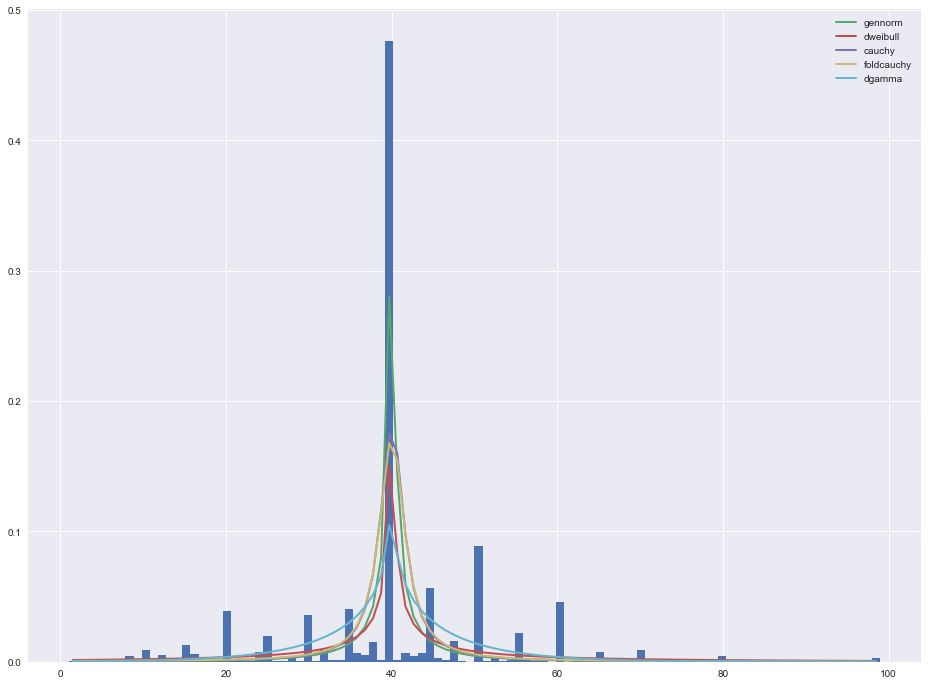

In [52]:
f_hpw.summary()

`hours-per-week` değişkeni için en uygun dağılım en düşük toplam kare hataya sahip olan `gennorm`(genelleştirilmiş normal) dağılımdır.